In [15]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [16]:
matplotlib.rc("font", family = "Magun Gothic")

In [17]:
df_raw = pd.read_csv("C:\\Users\\PIRL\\Downloads\\Big Data 분석\\유방암.csv")
df_raw_x = df_raw.drop("diagnosis" , axis = 1)
df_raw_y = df_raw["diagnosis"]
df_raw_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df_raw_x.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.156,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.114,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.208


In [19]:
sns.pairplot(df_raw_x)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001BBFE299730> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001BBFE2AD158> (for post_execute):


KeyboardInterrupt: 

In [6]:
df_raw_x.corr().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,...,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


In [20]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled Data : \n {}".format(nd_scaled[:5].round(3)))
print("Shape : \n {}".format(nd_scaled.shape))

Scaled Data : 
 [[ 1.097e+00 -2.073e+00  1.270e+00  9.840e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.650e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.610e-01
   1.149e+00  9.070e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.540e-01  1.686e+00  1.909e+00 -8.270e-01 -4.870e-01
  -2.400e-02  5.480e-01  1.000e-03 -8.690e-01  4.990e-01 -8.760e-01
   2.630e-01  7.420e-01 -6.050e-01 -6.930e-01 -4.410e-01  2.600e-01
  -8.050e-01 -9.900e-02  1.806e+00 -3.690e-01  1.535e+00  1.890e+00
  -3.760e-01 -4.300e-01 -1.470e-01  1.087e+00 -2.440e-01  2.810e-01]
 [ 1.580e+00  4.560e-01  1.567e+00  1.559e+00  9.420e-01  1.053e+00
   1.363e+00  2.037e+00  9.400e-01 -3.980e-01  1.229e+00 -7.800e-01
   8.510e-01  1.181e+00 -2.970e-01  8.150e-01  2.130e-01  1.425e+00
   2.370e-01  2.940e-01  1.512e+00 -2.400e-02  1.347e+00  1.456e+00
   5.270e-01  1.083e+00  8.550

In [21]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

df_scaled.describe().round(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.030,-2.229,-1.985,-1.454,-3.112,-1.610,-1.115,-1.262,-2.744,-1.820,...,-1.727,-2.224,-1.693,-1.222,-2.683,-1.444,-1.306,-1.745,-2.161,-1.602
25%,-0.689,-0.726,-0.692,-0.667,-0.711,-0.747,-0.744,-0.738,-0.703,-0.723,...,-0.675,-0.749,-0.690,-0.642,-0.691,-0.681,-0.757,-0.756,-0.642,-0.692
50%,-0.215,-0.105,-0.236,-0.295,-0.035,-0.222,-0.342,-0.398,-0.072,-0.178,...,-0.269,-0.044,-0.286,-0.341,-0.047,-0.270,-0.218,-0.223,-0.127,-0.216
75%,0.469,0.584,0.500,0.364,0.636,0.494,0.526,0.647,0.531,0.471,...,0.522,0.658,0.540,0.358,0.598,0.540,0.531,0.713,0.450,0.451
max,3.971,4.652,3.976,5.251,4.771,4.568,4.244,3.928,4.485,4.911,...,4.094,3.886,4.287,5.930,3.955,5.113,4.701,2.686,6.046,6.847


In [22]:
pca = PCA(n_components = 30)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data : \n {}".format(nd_pca[:5]))
print("Shape : \n {}".format(nd_pca.shape))


PCA Data : 
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00  3.63373090e+00
  -1.19511012e+00  1.41142445e+00  2.15936987e+00 -3.98407230e-01
  -1.57118359e-01 -8.77401880e-01  2.62955455e-01 -8.59014477e-01
   1.03387665e-01 -6.90804097e-01 -6.01793127e-01  7.45115792e-01
  -2.65470777e-01 -5.49562693e-01 -1.33767500e-01  3.45564905e-01
   9.65148929e-02  6.88499220e-02  8.45185932e-02 -1.75256284e-01
  -1.51020059e-01 -2.01503451e-01 -2.52584993e-01 -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01  1.11826386e+00
   6.21774980e-01  2.86563545e-02  1.33580935e-02  2.40988459e-01
  -7.11904816e-01  1.10699494e+00  8.13119658e-01  1.57922585e-01
  -9.43529283e-01 -6.53475327e-01  8.97486713e-03 -6.48808694e-01
  -1.72122035e-02  3.18297381e-01  2.47564629e-01 -1.14133080e-01
  -7.73274741e-02 -9.45784509e-02 -2.17718064e-01  1.12901180e-02
  -1.70510254e-01 -4.11287846e-02  1.81270166e-01  3.26241827e-02
  -5.68742432e-03 -1.8678762

In [23]:
df_pca = pd.DataFrame(nd_pca,columns = ["Prin 1","Prin 2","Prin 3","Prin 4","Prin 5","Prin 6","Prin 7","Prin 8","Prin 9","Prin 10",
                                       "Prin 11","Prin 12","Prin 13","Prin 14","Prin 15","Prin 16","Prin 17","Prin 18","Prin 19","Prin 20",
                                       "Prin 21","Prin 22","Prin 23","Prin 24","Prin 25","Prin 26","Prin 27","Prin 28","Prin 29","Prin 30"])
df_pca.head()

,Prin 1,Prin 2,Prin 3,Prin 4,Prin 5,Prin 6,Prin 7,Prin 8,Prin 9,Prin 10,...,Prin 21,Prin 22,Prin 23,Prin 24,Prin 25,Prin 26,Prin 27,Prin 28,Prin 29,Prin 30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [24]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrintNo"] = [l for l in range(1,31)]
df_pca_stat["ElgenValues"] = pca.explained_variance_
df_pca_stat["ElgenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrintNo,ElgenValues,ElgenValueRatio,CumEigenValueRatio
0,1,13.305,0.443,0.443
1,2,5.701,0.190,0.632
2,3,2.823,0.094,0.726
3,4,1.984,0.066,0.792
4,5,1.652,0.055,0.847
5,6,1.209,0.040,0.888
6,7,0.676,0.023,0.910
7,8,0.477,0.016,0.926
8,9,0.418,0.014,0.940
9,10,0.351,0.012,0.952


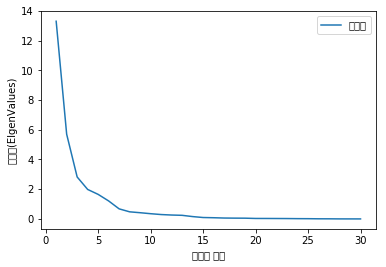

In [25]:
plt.plot(df_pca_stat["PrintNo"],df_pca_stat["ElgenValues"],label="고유값")
plt.ylabel("고유값(ElgenValues)")
plt.xlabel("주성분 번호")
plt.legend(loc ="best")

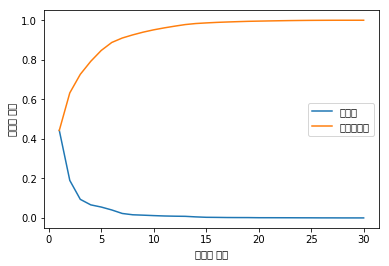

In [35]:
plt.plot(df_pca_stat["PrintNo"],df_pca_stat["ElgenValueRatio"],label="고유값")
plt.plot(df_pca_stat["PrintNo"],df_pca_stat["CumEigenValueRatio"],label="누적고유값")

plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc ="best")

In [36]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns = ["Prin 1","Prin 2","Prin 3","Prin 4","Prin 5","Prin 6","Prin 7","Prin 8","Prin 9","Prin 10",
                                       "Prin 11","Prin 12","Prin 13","Prin 14","Prin 15","Prin 16","Prin 17","Prin 18","Prin 19","Prin 20",
                                       "Prin 21","Prin 22","Prin 23","Prin 24","Prin 25","Prin 26","Prin 27","Prin 28","Prin 29","Prin 30"])],axis = 1)
df_eigenvector.round(3)

,Feature,Prin 1,Prin 2,Prin 3,Prin 4,Prin 5,Prin 6,Prin 7,Prin 8,Prin 9,...,Prin 21,Prin 22,Prin 23,Prin 24,Prin 25,Prin 26,Prin 27,Prin 28,Prin 29,Prin 30
0,mean radius,-0.219,0.234,0.009,-0.041,-0.038,-0.019,0.124,0.007,0.223,...,0.069,-0.073,0.099,-0.183,-0.019,0.129,0.132,-0.211,-0.211,0.702
1,mean texture,-0.104,0.060,-0.065,0.603,0.049,0.032,-0.011,-0.131,-0.113,...,-0.448,-0.095,0.001,0.099,0.085,0.025,0.017,0.000,0.011,0.000
2,mean perimeter,-0.228,0.215,0.009,-0.042,-0.037,-0.017,0.114,0.019,0.224,...,0.070,-0.075,0.040,-0.117,0.027,0.125,0.115,-0.084,-0.384,-0.690
3,mean area,-0.221,0.231,-0.029,-0.053,-0.010,0.002,0.052,-0.035,0.196,...,0.018,-0.098,-0.008,0.070,-0.210,-0.363,-0.467,0.273,0.423,-0.033
4,mean smoothness,-0.143,-0.186,0.104,-0.159,0.365,0.286,0.141,0.289,-0.006,...,0.119,-0.064,0.021,0.069,0.029,0.037,-0.070,-0.001,0.003,-0.005
5,mean compactness,-0.239,-0.152,0.074,-0.032,-0.012,0.014,-0.031,0.151,0.168,...,-0.193,0.098,-0.052,-0.104,0.397,-0.263,-0.098,0.005,0.041,0.045
6,mean concavity,-0.258,-0.060,-0.003,-0.019,-0.086,0.009,0.108,0.073,-0.041,...,-0.006,0.185,-0.325,0.045,-0.097,0.549,-0.365,-0.046,0.010,0.025
7,mean concave points,-0.261,0.035,0.026,-0.065,0.044,0.052,0.150,0.152,0.112,...,0.009,0.312,0.051,0.084,-0.186,-0.388,0.455,0.009,0.004,-0.001
8,mean symmetry,-0.138,-0.190,0.040,-0.067,0.306,-0.356,0.094,0.232,-0.256,...,0.087,0.018,0.051,0.019,-0.025,0.016,0.015,-0.001,0.008,-0.001
9,mean fractal dimension,-0.064,-0.367,0.023,-0.049,0.044,0.119,-0.296,0.177,0.124,...,0.076,-0.288,0.085,-0.133,-0.207,0.097,0.101,0.006,-0.007,-0.005


,Prin 1,Prin 2,Prin 3,Prin 4,Prin 5,Prin 6,Prin 7,Prin 8,Prin 9,Prin 10,...,Prin 21,Prin 22,Prin 23,Prin 24,Prin 25,Prin 26,Prin 27,Prin 28,Prin 29,Prin 30
Prin 1,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
Prin 2,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
Prin 3,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
Prin 4,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
Prin 5,-0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prin 6,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,0.0,-0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
Prin 7,-0.0,0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
Prin 8,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
Prin 9,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
Prin 10,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0,...,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0


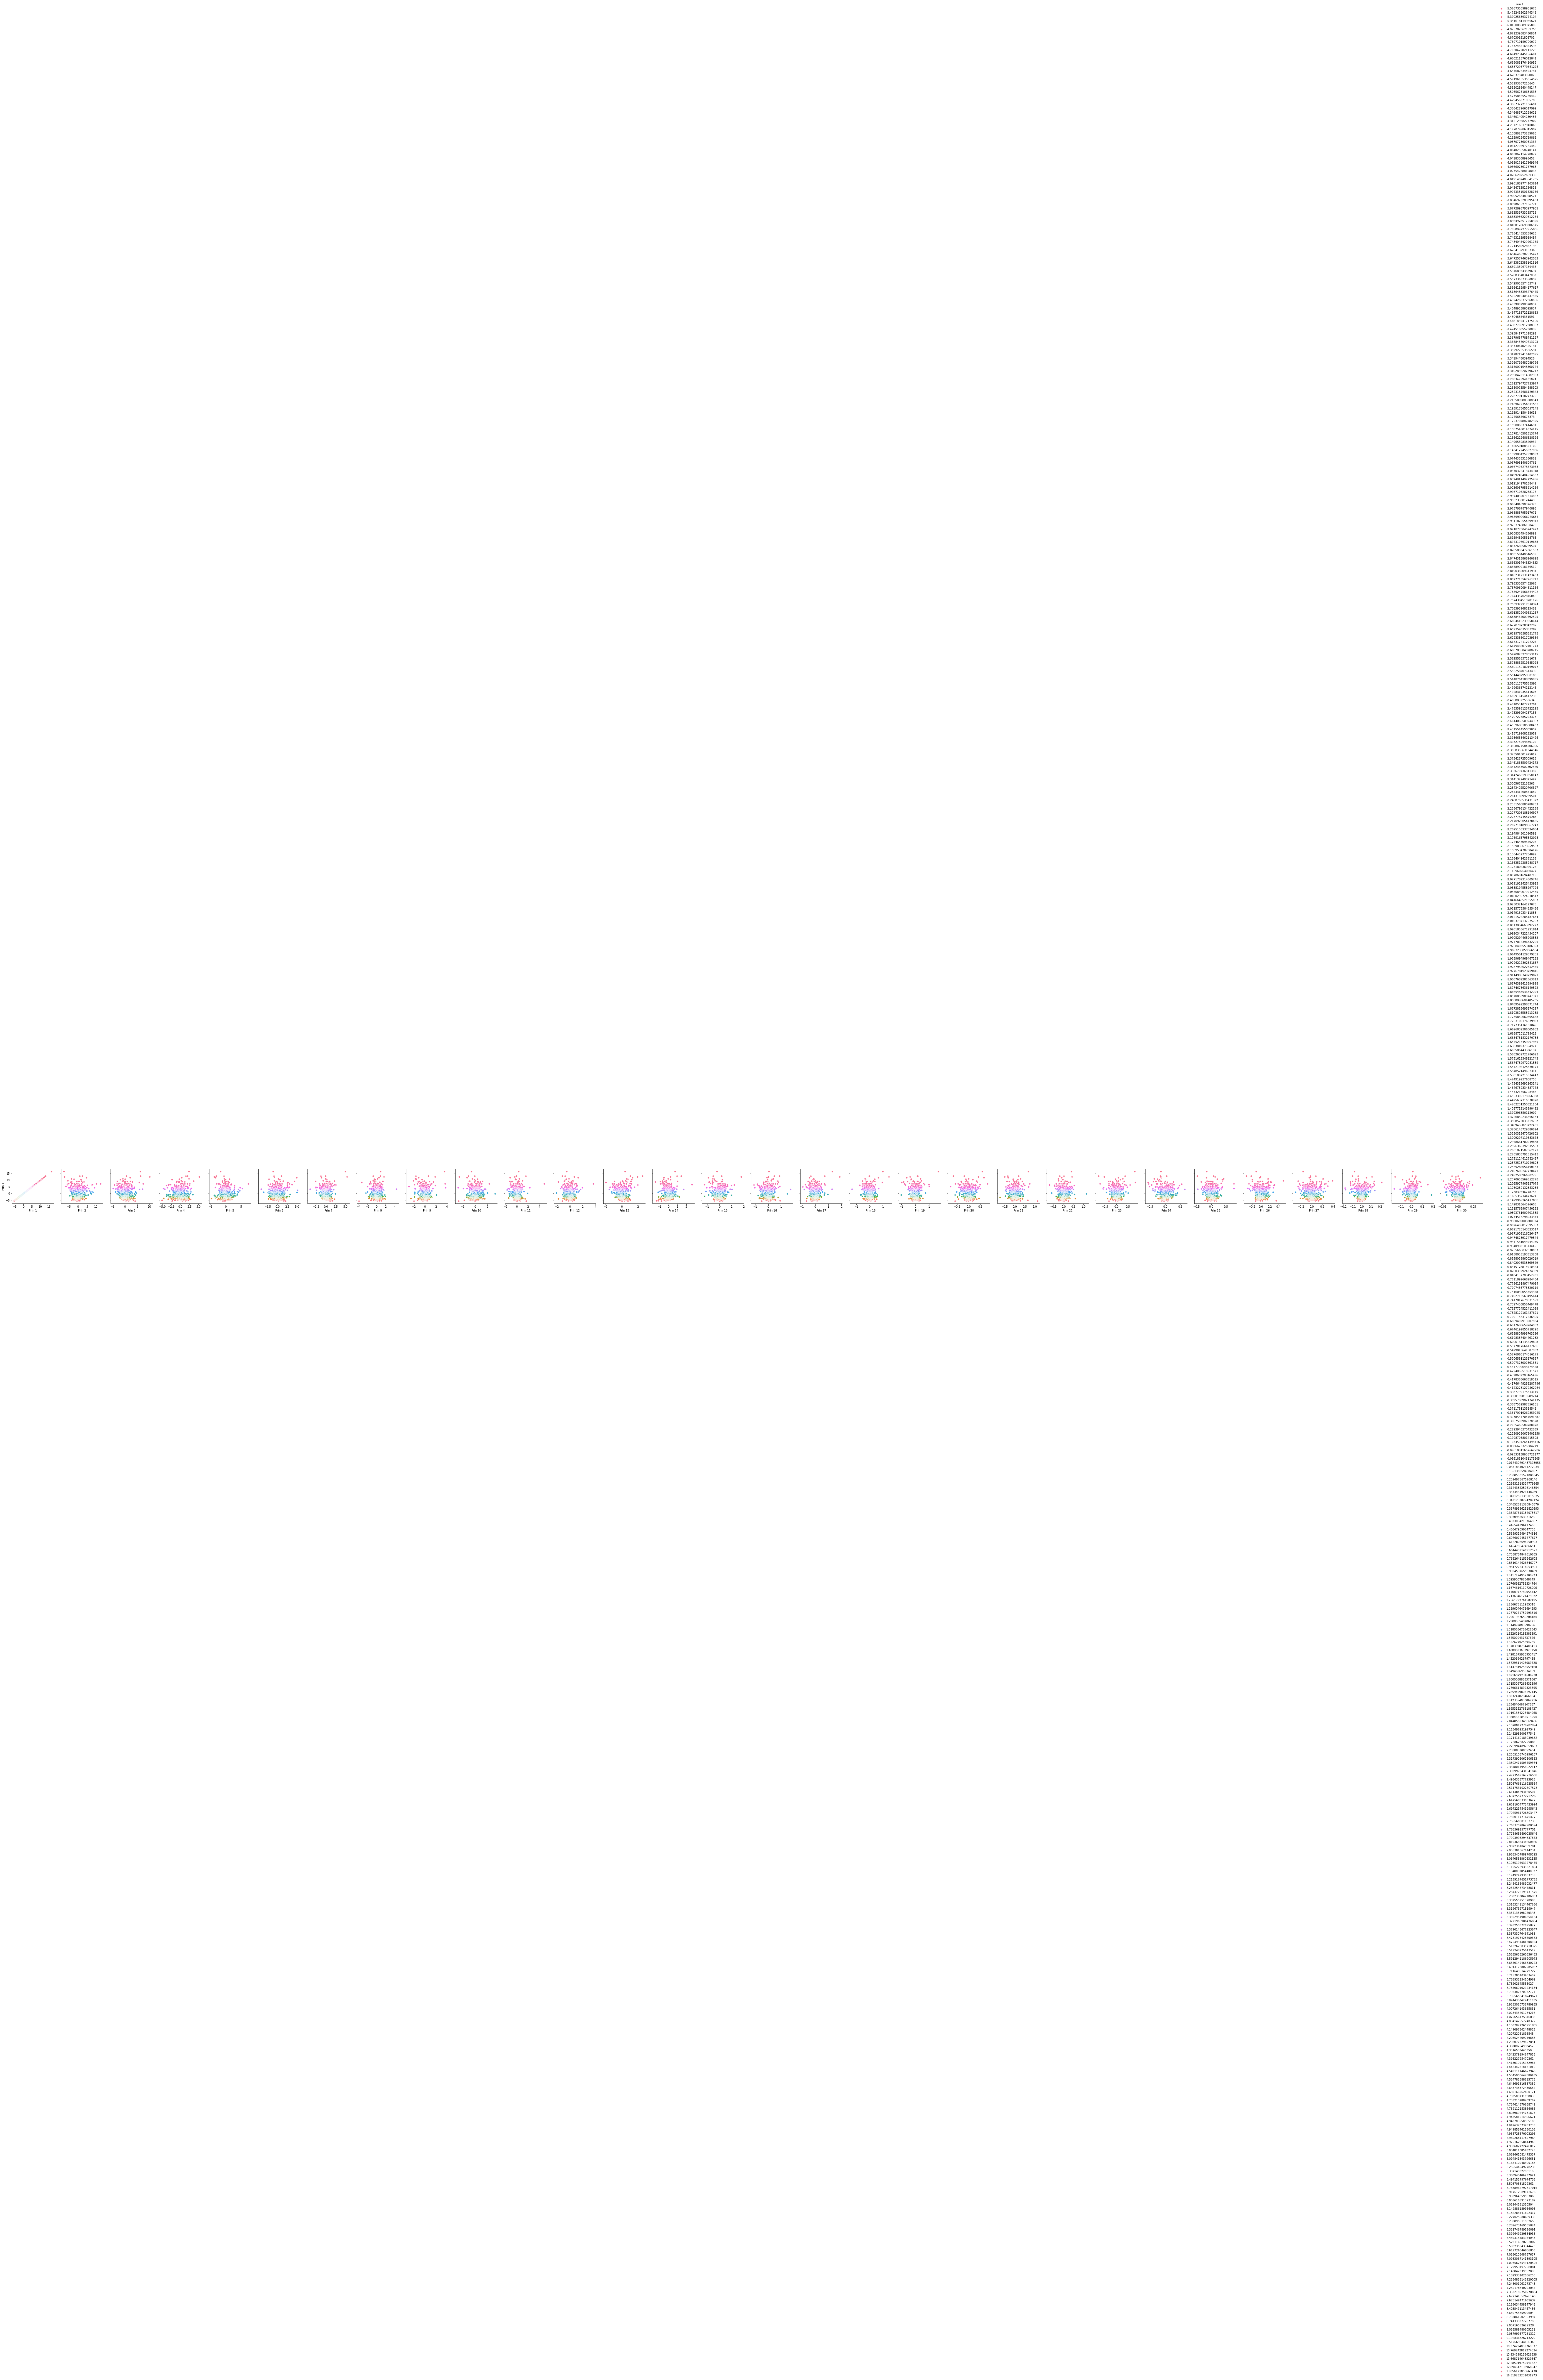

In [37]:
sns.pairplot(df_pca,y_vars = "Prin 1", x_vars =  ["Prin 1","Prin 2","Prin 3","Prin 4","Prin 5","Prin 6","Prin 7","Prin 8","Prin 9","Prin 10","Prin 11","Prin 12","Prin 13","Prin 14","Prin 15","Prin 16","Prin 17","Prin 18","Prin 19","Prin 20","Prin 21","Prin 22","Prin 23","Prin 24","Prin 25","Prin 26","Prin 27","Prin 28","Prin 29","Prin 30"],hue = "Prin 1")
df_pca.corr().round(3)

In [ ]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

In [ ]:
x_var = ["print 1","print 2","print 3"]
df_pca_const = sm.add_constant(df_pca)
reg_model = sm.OLS(df_raw_y,df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())